# DB Connector

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Kuldeepm@@n2002",
                            database = "ecommerce")

cur = db.cursor()

# Basic Quaries

### Q1. List all unique cities where customers are located.

In [2]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


### Q2. Count the number of orders placed in 2017.

In [3]:
# is like is for pattern or string matching

# year is a function here
query = """ select count(order_id) from orders where YEAR(order_purchase_timestamp) = '2017%' """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 45101)

### Q3. Find the total sales per category.

In [4]:
# Product se hum product ki cateogry lekar aa sakte hai or payment se hum payment ki value la sakte hai
# or agar aap price and frieht_val ko sum krdoge toh same hi value aayegi jo ki payemnts mein hai

# Product se product category lani haii or order_items se mujhe price and frieht_val

# order items and product mein common hai 'product_id', so we can apply join on basis of 'product_id'

# sum lagaya hai toh groupby karna padega

query = """ select UPPER(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

data


[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

In [5]:
df = pd.DataFrame(data , columns = ["Cateogry" , "Sales"])
df

,Cateogry,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


### Q4. Calculate the percentage of orders that were paid in installments.

In [6]:
# Jitne logo ne ek ya usse zyada installments di hai

query = """ select (sum(case when payment_installments >= 1 then 1
else 0 end)) / count(*) * 100 from payments
"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

### Q5. Count the number of customers from each state. 

In [7]:
query = """ select customer_state , count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()

data

[('SP', 41746),
 ('SC', 3637),
 ('MG', 11635),
 ('PR', 5045),
 ('RJ', 12852),
 ('RS', 5466),
 ('PA', 975),
 ('GO', 2020),
 ('ES', 2033),
 ('BA', 3380),
 ('MA', 747),
 ('MS', 715),
 ('CE', 1336),
 ('DF', 2140),
 ('RN', 485),
 ('PE', 1652),
 ('MT', 907),
 ('AM', 148),
 ('AP', 68),
 ('AL', 413),
 ('RO', 253),
 ('PB', 536),
 ('TO', 280),
 ('PI', 495),
 ('AC', 81),
 ('SE', 350),
 ('RR', 46)]

In [8]:
df = pd.DataFrame(data , columns=["state" , "customer_count"])
df

,state,customer_count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


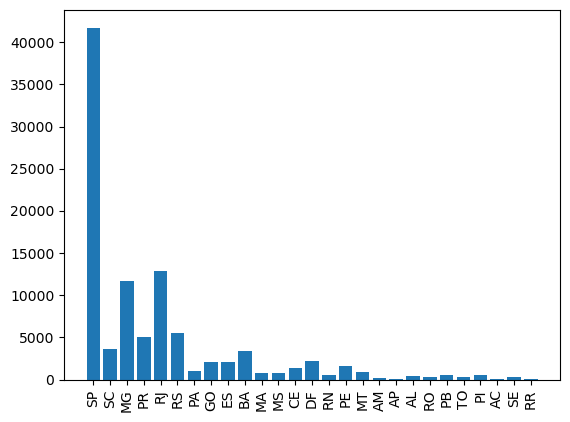

In [9]:
plt.bar(df["state"] , df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

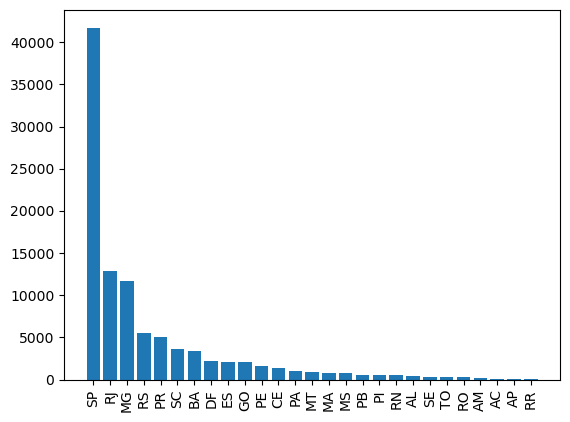

In [10]:
df = df.sort_values(by="customer_count" , ascending = False)
plt.bar(df["state"] , df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

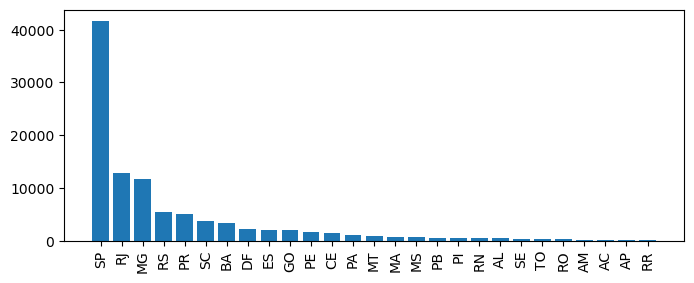

In [11]:
df = df.sort_values(by="customer_count" , ascending = False)

plt.figure(figsize=(8,3))
plt.bar(df["state"] , df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

# Intermediate Queries

### Q1. Calculate the number of orders per month in 2018.

In [12]:
query = """ select monthname(order_purchase_timestamp) months , count(order_id) order_count 
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns=["Month" , "Order_Count"])
df

,Month,Order_Count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


<BarContainer object of 10 artists>

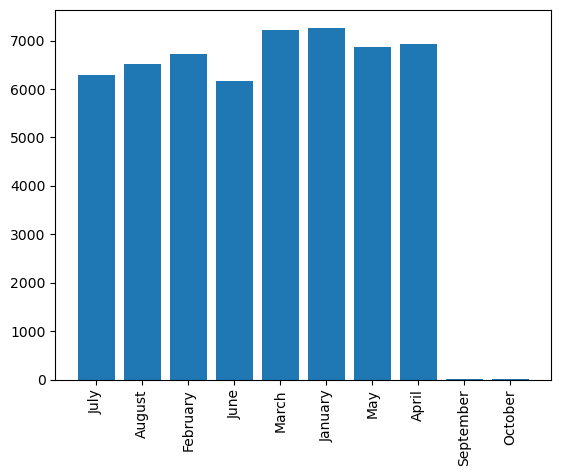

In [13]:
plt.xticks(rotation = 90)
plt.bar(df["Month"] , df["Order_Count"])

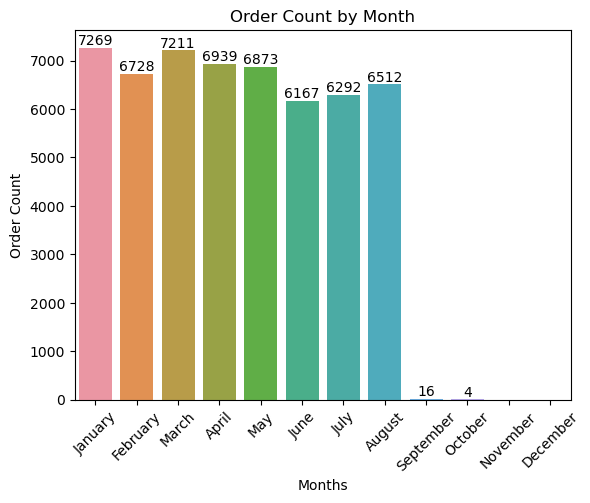

In [14]:
df = pd.DataFrame(data, columns=["months", "order_count"])

order = ["January", "February", "March", "April", "May", "June", 
         "July", "August", "September", "October", "November", "December"]

plt.xticks(rotation = 45)
ax = sns.barplot(x=df["months"], y=df["order_count"], data=df, order=order)

ax.bar_label(ax.containers[0])
plt.title('Order Count by Month')
plt.xlabel('Months')
plt.ylabel('Order Count')
plt.show()

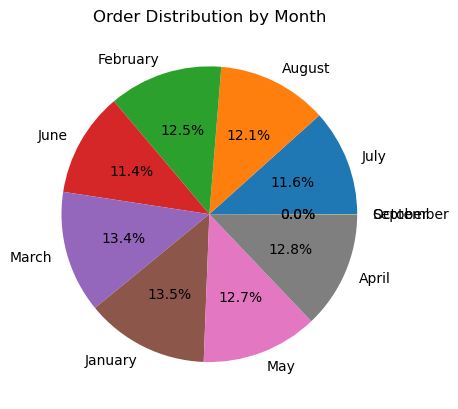

In [17]:
plt.pie(df["order_count"], labels=df["months"], autopct='%1.1f%%')
plt.title('Order Distribution by Month')
plt.show()

### Q2. Find the average number of products per order, grouped by customer city.

Humne har order id customer id ke basis pe count of products nikale ki har order mein har customer ke kitne total products hai fir usko city ke basis pe avergae nikaldiya humne

In [18]:
# ek hi bande ne boht saaare produt buy karrakhe hai bruh

# iske basis pe count liya hai toh groupby bhi karna padega
query = """ with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items 
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id) 
 
select customers.customer_city , round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
""" 

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["Customer City" , "Average Products Per Order"])

df.head(10)

,Customer City,Average Products Per Order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


### Q3. Calculate the percentage of total revenue contributed by each product category.

In [31]:
# category ke basis pe revenue humne already nikal rakha hai

# 1. Total Sales i.e. Payments ke andar jitni bhi value aayi hai uska sum
# select sum(payment_value) from payments;

query = """ 
select UPPER(products.product_category) category, 
round((sum(payments.payment_value) / (select sum(payment_value) from payments))*100 , 2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc
""" 

cur.execute(query)

df = pd.DataFrame(data , columns = ["Category" , "Percentage Distribution"])

df.head(10)

,Category,Percentage Distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


### Q4. Identify the correlation between product price and the number of times a product has been purchased.

In [26]:
# # 1. Count of times the product have been bought/ordered
# query = """ 
# select products.product_category,
# count(order_items.product_id)
# from products join order_items
# on products.product_id = order_items.product_id
# group by products.product_category
# """ 

# 2. Ab har product kitni baar order hua hai vo yha pe mentioned hai ab iske basis pe hum inki price nikallete hai, order items ke andar hi price pada hai

# Ab yeah same value aayegi jo price ki value hai vohi avg ki ayegi agar koi discount nahi tha, koi value badai ya ghatai nahi haii then only , or agar kari hai toh on an average hume yha pe vo value miljayegi becuase we have to do comparisons here

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Kuldeepm@@n2002",
                            database = "ecommerce")

cur = db.cursor()


query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data,columns = ["Category", "order_count","price"])
df

,Category,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [28]:
# Correlation : Whether Price and Order Count are proportional or inv proportional or not
# so we can;t say much about this
import numpy as np
arr1 = df["order_count"]
arr2 = df["price"]

np.corrcoef([arr1,arr2])

#  -0.10631514 close to zero so it is very much neutral, so what we can conclude is that they are not correlated 

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

In [29]:
a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157562


### Q5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [35]:
# window function utilise
# we can find reveneue on basis of seller id
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Kuldeepm@@n2002",
                            database = "ecommerce")

cur = db.cursor()



query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


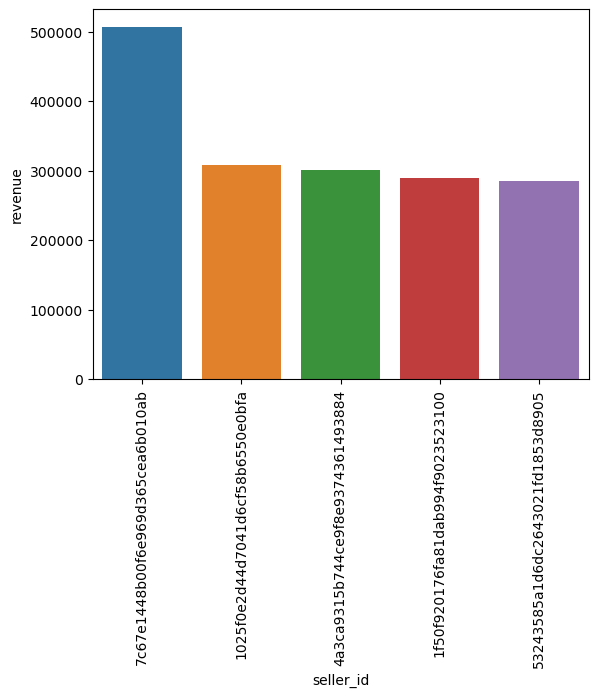

In [37]:
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Advanced Quaries

### Q1. Calculate the moving average of order values for each customer over their order history.

In [40]:
# hum yha pe 3 months ka moving avergae lene wale hai, customer id mein order_purchase_timestamp nikalenge or uske basis pe price nikalenge i.e. in order_items mein rakha hau hai , hum payment se bhi nikalsakte hai
# 1.
# select orders.customer_id, orders.order_purchase_timestamp,
# payments. payment_value
# from payments join orders
# on payments.order_id = orders.order_id;
query = """ 
select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

# jinhone 3 order place kiye unhi ka moving vergae niklega jisne ek hi order place kiya uska kya hi moving avg bhaii

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


### Q2. Calculate the cumulative sales per month for each year.

In [41]:
# 200 200
# 300 500
# 600 1100
# 800 1900
# 1000 2900

# ab pehle har saal ya month ke basis pe sale nikalo 
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


### Q3. Calculate the year-over-year growth rate of total sales.

In [44]:
# sabse pehle har saal ki sales nikalenge tabhi toh compare kar payenge

query = """with a as(select year(orders.order_purchase_timestamp) as years,
round (sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, payment, lag(payment, 1) over(order by years) previous_year from a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "sales", "previous_year"])
df

,years,sales,previous_year
0,2016,59362.34,NaN
1,2017,7249746.73,59362.34
2,2018,8699763.05,7249746.73


In [47]:
# curr_year - prev_year / prev_year
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


### Q4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [46]:
# pehle toh first purchase nikalenge fir next purchase niakelnege or fir unka % nikalenge ki first urchase kab hui thi min value kya hai or 2nd purchase ke liye hum log check karnege ki kya jo next purchase hai inki kya vo 6 months ke andar andar hui hai , then we will count the % of people jinki next purchase 6 months ke andar andar hui haii
query = """
# 1.
with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

# 2.
b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
# first order se bada ho lekin 6 mahino ke andar aata ho
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 


# 3.
select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

Since there is no customer that purchased from us again in 6 months

### Q5. Identify the top 3 customers who spent the most money in each year.

In [48]:
# 2.
query = """select years, customer_id, payment, d_rank
from
# 1.
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.080078125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31005859375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66015625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.8798828125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.2099609375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.43994140625, 3)]

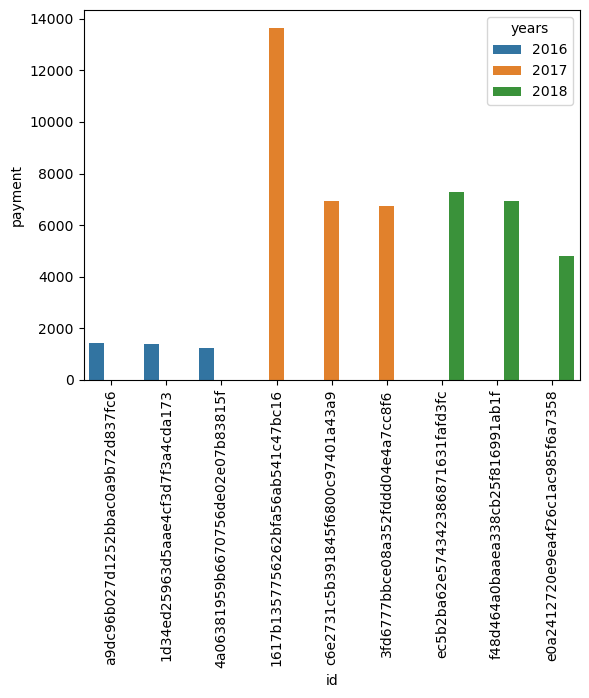

In [51]:
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()